In [ ]:
# Description: This program predicts the price of GOOG stock for a   
               specific day 
#              using the Machine Learning algorithm called Support 
               Vector Regression (SVR) 
#              

In [ ]:
# NPM    : 15119516
# NAMA   : Ricky Amedio Raditya
# KELAS  : 3KA17

In [1]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
#Load the data
from google.colab import files 
uploaded = files.upload() 



Saving GOOG_stock.csv to GOOG_stock (4).csv


In [3]:
#Store and look at the data
df = pd.read_csv('GOOG_stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,2917.689941,2936.409912,2870.100098,2895.500000,2895.500000,4176400
1,2021-09-06,2894.989990,2920.379883,2834.830078,2838.419922,2838.419922,3917500
2,2021-09-13,2864.020020,2911.629883,2821.229980,2829.270020,2829.270020,7003600
3,2021-09-20,2780.003906,2858.070068,2741.060059,2852.659912,2852.659912,5366900
4,2021-09-27,2831.709961,2850.000000,2660.000000,2729.250000,2729.250000,7552700
5,2021-10-04,2713.989990,2806.340088,2623.330078,2801.120117,2801.120117,5629700
6,2021-10-11,2796.000000,2844.000000,2725.000000,2833.500000,2833.500000,4908800
7,2021-10-18,2824.270020,2884.955078,2743.409912,2772.500000,2772.500000,4742600
8,2021-10-25,2776.209961,2982.360107,2734.969971,2965.409912,2965.409912,8128100
9,2021-11-01,2963.300049,3011.415039,2871.590088,2984.820068,2984.820068,5820800


In [9]:
actual_price = df.tail(40)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1,2021-09-06,2894.989990,2920.379883,2834.830078,2838.419922,2838.419922,3917500
2,2021-09-13,2864.020020,2911.629883,2821.229980,2829.270020,2829.270020,7003600
3,2021-09-20,2780.003906,2858.070068,2741.060059,2852.659912,2852.659912,5366900
4,2021-09-27,2831.709961,2850.000000,2660.000000,2729.250000,2729.250000,7552700
5,2021-10-04,2713.989990,2806.340088,2623.330078,2801.120117,2801.120117,5629700
6,2021-10-11,2796.000000,2844.000000,2725.000000,2833.500000,2833.500000,4908800
7,2021-10-18,2824.270020,2884.955078,2743.409912,2772.500000,2772.500000,4742600
8,2021-10-25,2776.209961,2982.360107,2734.969971,2965.409912,2965.409912,8128100
9,2021-11-01,2963.300049,3011.415039,2871.590088,2984.820068,2984.820068,5820800
10,2021-11-08,3000.000000,3020.689941,2906.500000,2992.909912,2992.909912,4374200


In [18]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,2917.689941,2936.409912,2870.100098,2895.500000,2895.500000,4176400
1,2021-09-06,2894.989990,2920.379883,2834.830078,2838.419922,2838.419922,3917500
2,2021-09-13,2864.020020,2911.629883,2821.229980,2829.270020,2829.270020,7003600
3,2021-09-20,2780.003906,2858.070068,2741.060059,2852.659912,2852.659912,5366900
4,2021-09-27,2831.709961,2850.000000,2660.000000,2729.250000,2729.250000,7552700
5,2021-10-04,2713.989990,2806.340088,2623.330078,2801.120117,2801.120117,5629700
6,2021-10-11,2796.000000,2844.000000,2725.000000,2833.500000,2833.500000,4908800
7,2021-10-18,2824.270020,2884.955078,2743.409912,2772.500000,2772.500000,4742600
8,2021-10-25,2776.209961,2982.360107,2734.969971,2965.409912,2965.409912,8128100
9,2021-11-01,2963.300049,3011.415039,2871.590088,2984.820068,2984.820068,5820800


In [10]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [11]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [12]:
#Create the independent data set
for day in df_days:
   days.append( [int(day.split('-')[2])] )
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [13]:
 print(days)

[[30], [6], [13], [20], [27], [4], [11], [18], [25], [1], [8], [15], [22], [29], [6], [13], [20], [27], [3], [10], [17], [24], [31], [7], [14], [21], [28], [7], [14], [21], [28], [4], [11], [18], [25], [2], [9], [16], [23], [30], [31]]


In [14]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

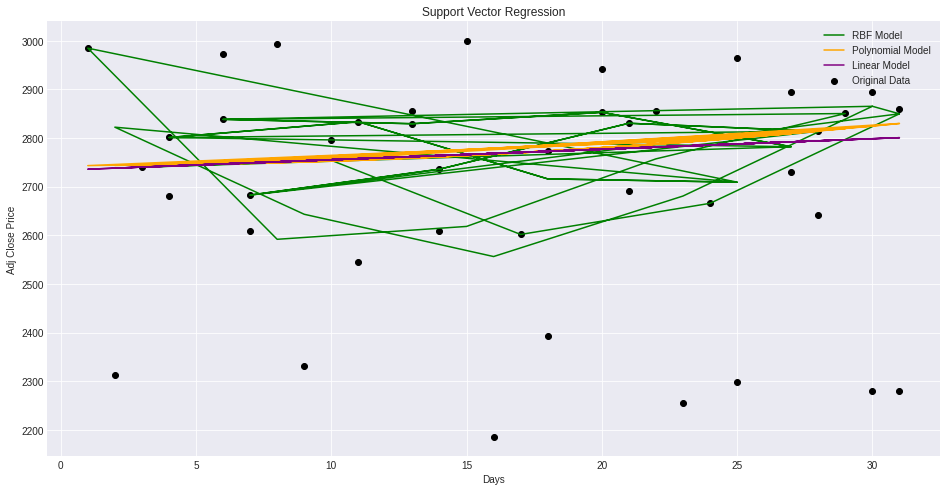

In [15]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [16]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2865.21052045]
The Linear SVR predicted: [2798.5279296]
The Polynomial SVR predicted: [2824.36759728]
